In [21]:
import pandas as pd

data = pd.read_csv("C:/Users/msteinme/Documents/project1revisit2csv.csv")
sec1 = data[['latedate', 'Spotdollar', '2monthcrude', '2monthcorn','2monthurea']]
sec1 = sec1.dropna()
sec1.tail()

,latedate,Spotdollar,2monthcrude,2monthcorn,2monthurea
1450,2/19/2016,96.600,31.75,369.25,233
1453,2/22/2016,97.379,33.39,372.25,234
1454,2/23/2016,97.481,33.60,366.75,230
1455,2/24/2016,97.458,34.07,364.50,227
1456,2/25/2016,97.287,34.83,360.50,234


In [1]:
import bokeh.plotting as bkh
bkh.output_notebook()

BokehJS successfully loaded.

In [22]:
sec1.describe()

,Spotdollar,2monthcrude,2monthcorn,2monthurea
count,985.000000,985.000000,985.000000,985.000000
mean,85.761370,81.614183,503.430711,336.541117
std,7.045145,23.253493,140.272537,68.117296
min,78.709000,28.350000,333.500000,188.000000
25%,80.287000,58.680000,384.750000,286.000000
50%,82.247000,92.630000,450.750000,320.000000
75%,94.201000,98.670000,620.750000,405.000000
max,100.330000,109.520000,838.750000,525.000000


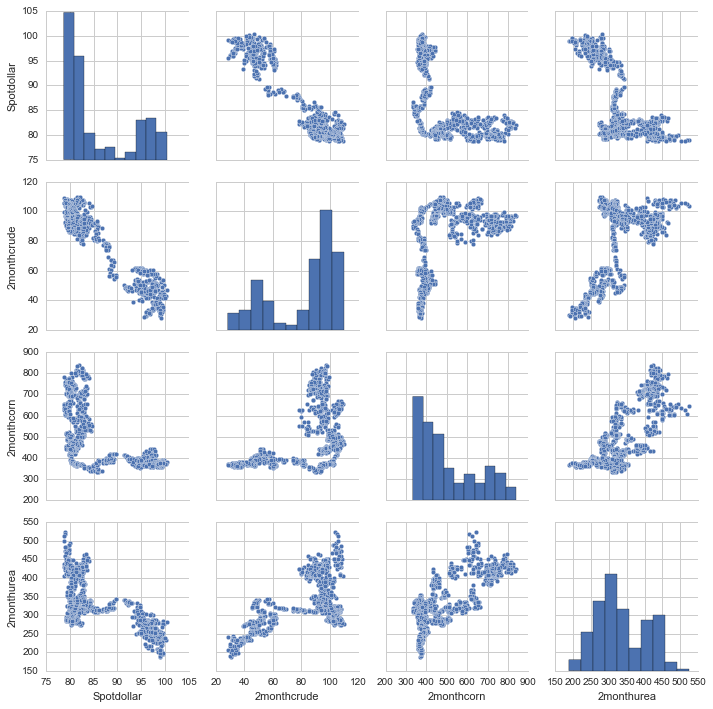

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
#cols= ['Spotdollar', '2monthcrude', '2monthcorn', '2monthurea','precipitation', 'temp']
sns.pairplot(sec1, size=2.5);
plt.show()

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


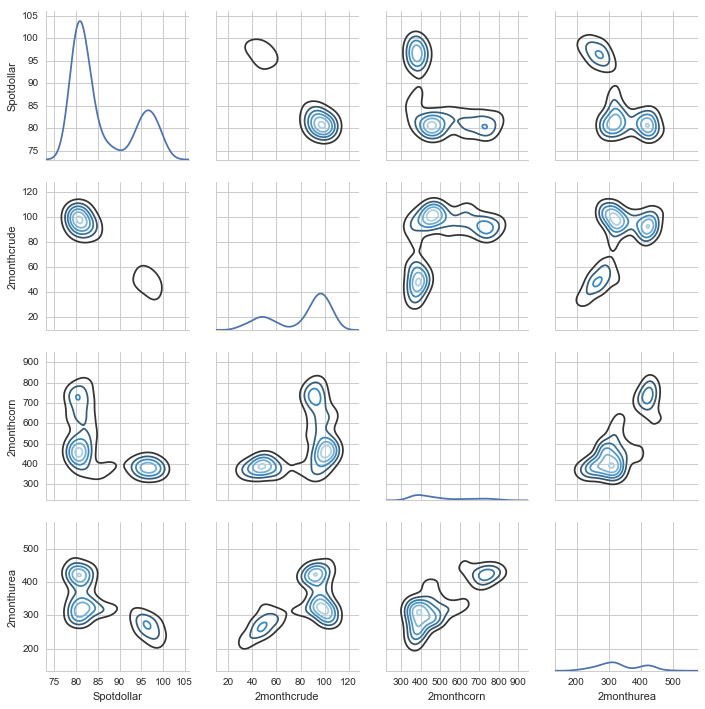

In [24]:
g = sns.PairGrid(sec1)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6)

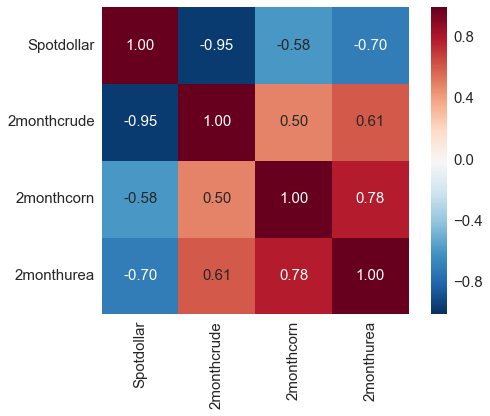

In [4]:
import numpy as np
cols= ['Spotdollar', '2monthcrude', '2monthcorn','2monthurea']
cm = np.corrcoef(sec1[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()
#spotdollar, corn, temp seem to be good choice for exploratory variable


In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X=sec1[['Spotdollar', '2monthcrude', '2monthcorn']].values
y=sec1['2monthurea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(n_estimators=150, criterion='mse',random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))

MSE train: 54.641, test: 293.140
R^2 train: 0.988, test: 0.940


In [30]:
#shows accuracy
forest.score(X_test, y_test)

0.93979414348401547

In [6]:
p = pd.read_csv("C:/Users/msteinme/Documents/predict2.csv")
p

,Spotdollar,2monthcrude,2monthcorn
0,98.148,34.58,359.50
1,98.211,35.58,357.00
2,98.352,36.15,355.75
3,98.214,36.30,356.25
4,97.592,36.33,356.50
5,97.340,37.75,358.25
6,97.071,39.82,359.00
7,97.255,38.77,359.50


In [7]:
l = p[['Spotdollar', '2monthcrude', '2monthcorn']].values
forest.predict(l)

array([ 220.46666667,  226.15333333,  226.07333333,  226.71333333,
        229.62666667,  231.12      ,  253.8       ,  232.64666667])

In [8]:
forest.feature_importances_

array([ 0.24659109,  0.09600928,  0.65739963])

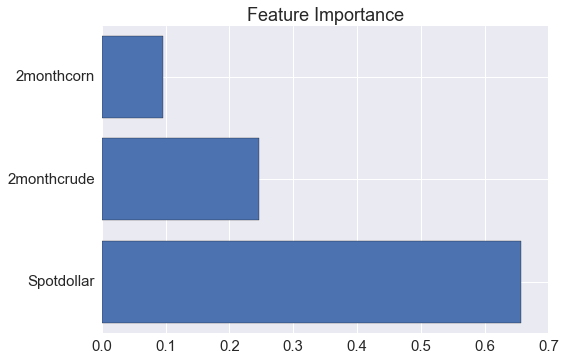

In [20]:
cols = ('Spotdollar', '2monthcrude','2monthcorn')
y_pos = np.arange(len(cols))
importance = forest.feature_importances_
indices= np.argsort(importance)[::-1]
plt.figure()
plt.barh(y_pos, importance[indices],align='center')
plt.yticks(y_pos,cols)
plt.title('Feature Importance')
plt.show()

In [34]:
c = [98.148,34.58,359.5]
print(forest.predict(c))
print (forest.predict([98.211,35.58,357]))
print (forest.predict([98.352,36.15,355.75]))
print (forest.predict([98.214,36.3,356.25]))
print (forest.predict([97.592,36.33,356.5]))
print (forest.predict([97.34,37.75,358.25]))
print (forest.predict([97.071,39.82,359]))
print (forest.predict([97.255,38.77,359.5]))

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


[ 220.46666667]
[ 226.15333333]
[ 226.07333333]

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)



[ 226.71333333]
[ 229.62666667]

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)



[ 231.12]
[ 253.8]

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)



[ 232.64666667]


In [7]:
actual1 = 232
actual2 = 230
actual3 = 213
actual4 = 210
actual5 = 213
actual6 = 213
actual7 = 213
actual8 = 213
error1_s = abs(220.46666667- actual1)/actual1 * 100
error2_s = abs(226.15333333- actual2)/actual2 * 100
error3_s = abs(226.07333333- actual3)/actual3 * 100
error4_s = abs(226.71333333- actual4)/actual4 * 100
error5_s = abs(229.62666667 - actual5)/actual5 * 100
error6_s = abs(231.12 - actual6)/actual6 * 100
error7_s = abs(253.8- actual7)/actual7 * 100
error8_s = abs(232.64666667 - actual8)/actual8 * 100
print (error1_s)
print (error2_s)
print (error3_s)
print (error4_s)
print (error5_s)
print (error6_s)
print (error7_s)
print (error8_s)

4.971264366379312
1.6724637695652134
6.137715178403754
7.958730157142862
7.805946793427227
8.507042253521128
19.154929577464795
9.223787169014086


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X=sec1[['Spotdollar', '2monthcrude', '2monthcorn']].values
y=sec1['2monthurea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(n_estimators=200, criterion='mse',random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))

MSE train: 54.493, test: 297.485
R^2 train: 0.988, test: 0.939


In [23]:
forest

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=-1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [25]:
print (forest.predict([98.148,34.58,359.5]))
print (forest.predict([98.211,35.58,357]))
print (forest.predict([98.352,36.15,355.75]))
print (forest.predict([98.214,36.3,356.25]))
print (forest.predict([97.592,36.33,356.5]))
print (forest.predict([97.34,37.75,358.25]))
print (forest.predict([97.071,39.82,359]))
print (forest.predict([97.255,38.77,359.5]))

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


[ 221.075]
[ 226.65]
[ 226.525]

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)



[ 227.08]
[ 229.715]

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)



[ 231.24]
[ 254.815]

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)



[ 232.965]


In [27]:
actual1 = 232
actual2 = 230
actual3 = 213
actual4 = 210
actual5 = 213
actual6 = 213
actual7 = 213
actual8 = 213
error1_s = abs(221.075- actual1)/actual1 * 100
error2_s = abs(226.65- actual2)/actual2 * 100
error3_s = abs(226.525- actual3)/actual3 * 100
error4_s = abs(227.08- actual4)/actual4 * 100
error5_s = abs(229.715 - actual5)/actual5 * 100
error6_s = abs(231.24 - actual6)/actual6 * 100
error7_s = abs(254.815- actual7)/actual7 * 100
error8_s = abs(232.965 - actual8)/actual8 * 100
print (error1_s)
print (error2_s)
print (error3_s)
print (error4_s)
print (error5_s)
print (error6_s)
print (error7_s)
print (error8_s)

4.709051724137936
1.4565217391304321
6.349765258215966
8.13333333333334
7.847417840375588
8.563380281690144
19.631455399061032
9.37323943661972


Random Forest with the number of trees and Max Depth: 
100-6


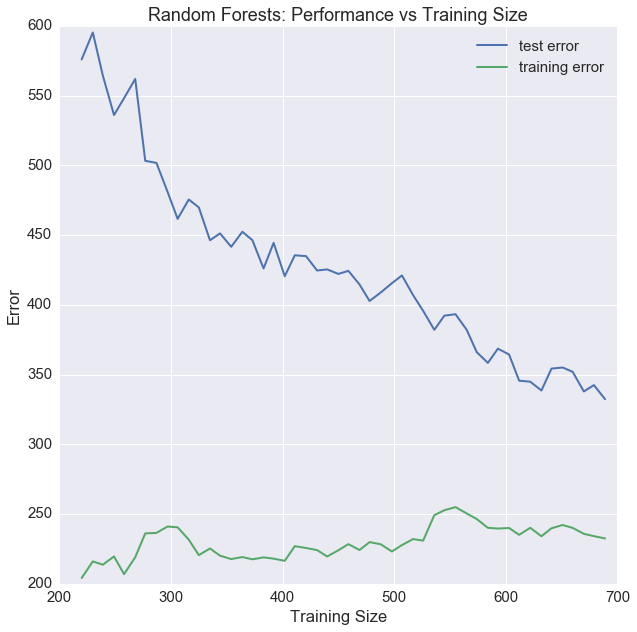

In [38]:
from sklearn import metrics
def performance_metric(label, prediction):
    """Calculate and return the appropriate error performance metric."""
    
    mse = metrics.mean_squared_error(label, prediction)
    return mse

def learning_curve(num_of_trees,depth, X_train, y_train, X_test, y_test):
    """Calculate the performance of the model after a set of training data."""

    # vary the training set size so 50 different sizes
    sizes = np.round(np.linspace(220, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    print ("Random Forest with the number of trees and Max Depth: ")
    print (str(num_of_trees)+'-'+str(depth))

    for i, s in enumerate(sizes):

        # Create and fit the RandomForests regressor model
        regressor = RandomForestRegressor(n_estimators=num_of_trees,max_depth=depth)
        regressor.fit(X_train[:s], y_train[:s])

        # Find the performance on the training and testing set
        train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))


    # Plot learning curve graph
    learning_curve_graph(sizes, train_err, test_err)
    
def learning_curve_graph(sizes, train_err, test_err):
    """Plot training and test error as a function of the training size."""

    plt.figure(figsize=(10,10))
    plt.title('Random Forests: Performance vs Training Size')
    plt.plot(sizes, test_err, lw=2, label = 'test error')
    plt.plot(sizes, train_err, lw=2, label = 'training error')
    plt.legend()
    plt.xlabel('Training Size')
    plt.ylabel('Error')
    plt.show()
    
depth = 6
num_of_trees=100
learning_curve(num_of_trees,depth, X_train, y_train, X_test, y_test)

Random Forest with the number of trees and Max Depth: 
200-10


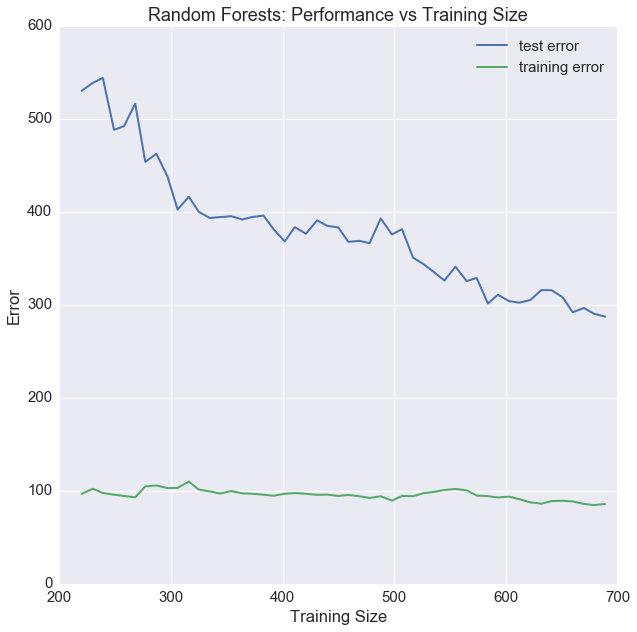

In [39]:
depth = 10
num_of_trees=200
learning_curve(num_of_trees,depth, X_train, y_train, X_test, y_test) #so this graph below shows around 70% training size is the best

Model Complexity: 


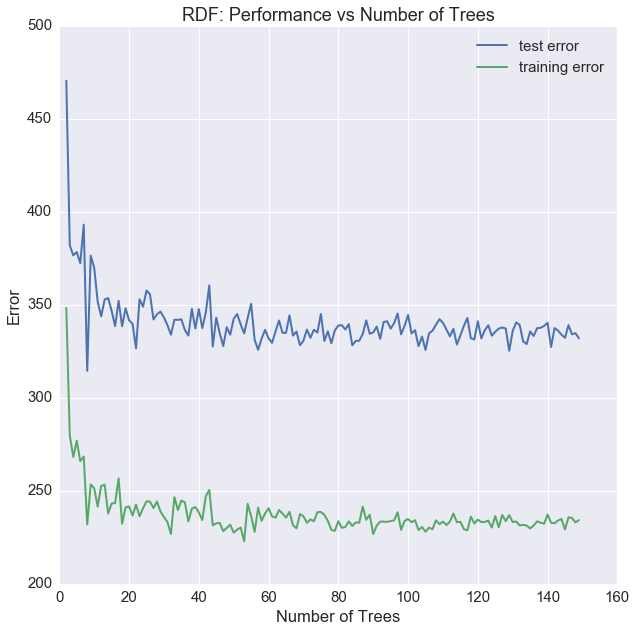

In [43]:
def model_complexity(X_train, y_train, X_test, y_test):
    """Calculate the performance of the model as model complexity increases."""

    print ("Model Complexity: ")

    # We will vary the number of tress from 2 to 150
    num_of_trees = np.arange(2, 150)
    train_err = np.zeros(len(num_of_trees))
    test_err = np.zeros(len(num_of_trees))

    for i, d in enumerate(num_of_trees):
        # Setup a Random Forest Regressor so that it learns with d trees
        regressor = RandomForestRegressor(n_estimators=d,max_depth=6)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    model_complexity_graph(num_of_trees, train_err, test_err)

def model_complexity_graph(num_of_trees, train_err, test_err):
    """Plot training and test error as a function of the number of trees in Random Forests learning."""

    plt.figure(figsize=(10,10))
    plt.title('RDF: Performance vs Number of Trees')
    plt.plot(num_of_trees, test_err, lw=2, label = 'test error')
    plt.plot(num_of_trees, train_err, lw=2, label = 'training error')
    plt.legend()
    plt.xlabel('Number of Trees')
    plt.ylabel('Error')
    plt.show()
    
model_complexity(X_train, y_train, X_test, y_test)

In [46]:
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150),
                  'max_depth':(6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [47]:
rdf_model = fit_predict_model(X_train,y_train)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150), 'max_depth': (6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)


In [48]:
print (rdf_model.best_estimator_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [51]:
y_predicted_new = rdf_model.predict(X_test)
rdf_mse_new = performance_metric(y_predicted_new,y_test)
print ('RandomForests Model - Mean Squared Error new is '+str(rdf_mse_new))

RandomForests Model - Mean Squared Error new is 292.359457066


In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X=sec1[['Spotdollar', '2monthcrude', '2monthcorn']].values
y=sec1['2monthurea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0,n_estimators=125, n_jobs=1, oob_score=False, random_state=None,verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))

MSE train: 85.085, test: 292.546
R^2 train: 0.981, test: 0.940


In [53]:
print (forest.predict([98.148,34.58,359.5]))
print (forest.predict([98.211,35.58,357]))
print (forest.predict([98.352,36.15,355.75]))
print (forest.predict([98.214,36.3,356.25]))
print (forest.predict([97.592,36.33,356.5]))
print (forest.predict([97.34,37.75,358.25]))
print (forest.predict([97.071,39.82,359]))
print (forest.predict([97.255,38.77,359.5]))

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single

[ 219.89508485]
[ 226.57508485]
[ 226.66708485]
[ 226.66508485]
[ 229.34641818]
[ 231.05541818]
[ 257.93688889]
[ 232.17408485]


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [54]:
actual1 = 232
actual2 = 230
actual3 = 213
actual4 = 210
actual5 = 213
actual6 = 213
actual7 = 213
actual8 = 213
error1_s = abs(219.89508485- actual1)/actual1 * 100
error2_s = abs(226.57508485- actual2)/actual2 * 100
error3_s = abs(226.66708485- actual3)/actual3 * 100
error4_s = abs(226.66508485- actual4)/actual4 * 100
error5_s = abs(229.34641818 - actual5)/actual5 * 100
error6_s = abs(231.05541818- actual6)/actual6 * 100
error7_s = abs(257.93688889- actual7)/actual7 * 100
error8_s = abs(232.17408485 - actual8)/actual8 * 100
print (error1_s)
print (error2_s)
print (error3_s)
print (error4_s)
print (error5_s)
print (error6_s)
print (error7_s)
print (error8_s)

5.217635840517246
1.4890935434782626
6.416471760563384
7.93575469047619
7.674374732394367
8.476722150234743
21.09713093427229
9.001917769953058


In [12]:
newx = forest.predict(X)

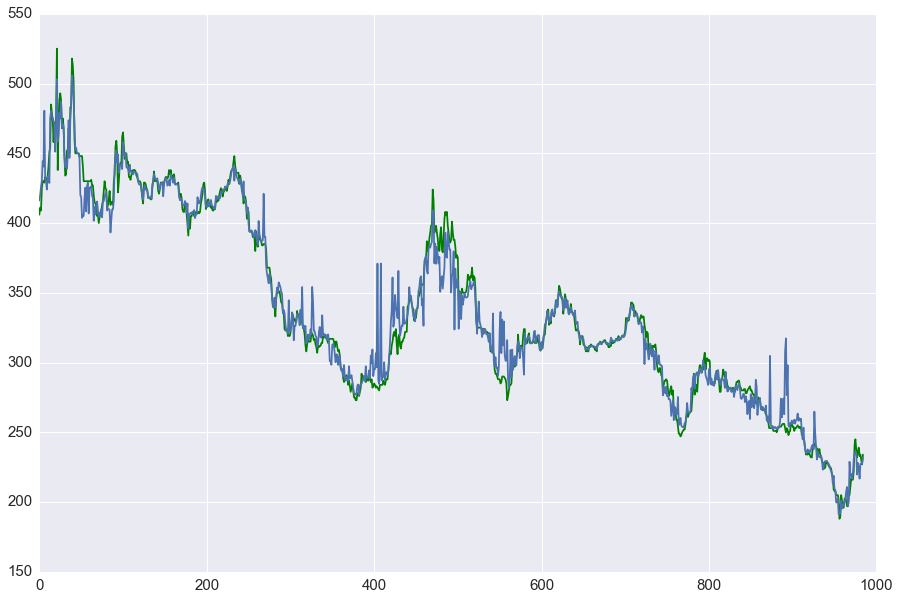

In [13]:
plt.figure(figsize=(15,10))
plt.plot(y,'g')
plt.plot(newx)

In [20]:
from sklearn import grid_search
from sklearn import metrics
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [22]:
from sklearn import metrics
rdf_model = fit_predict_model(X_train,y_train)
print (rdf_model.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
